In [1]:
from work.load.main import (
    plot_saliency_time,
)
import joblib

results = joblib.load('output/results.joblib')
csv_name = next(iter(results.keys()))           # just take the first trained file
artifacts_path = results[csv_name]["artifacts_path"]

print(csv_name)




mm118648.csv


c:\Users\janav\Documents\projects\xai-sandbox\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


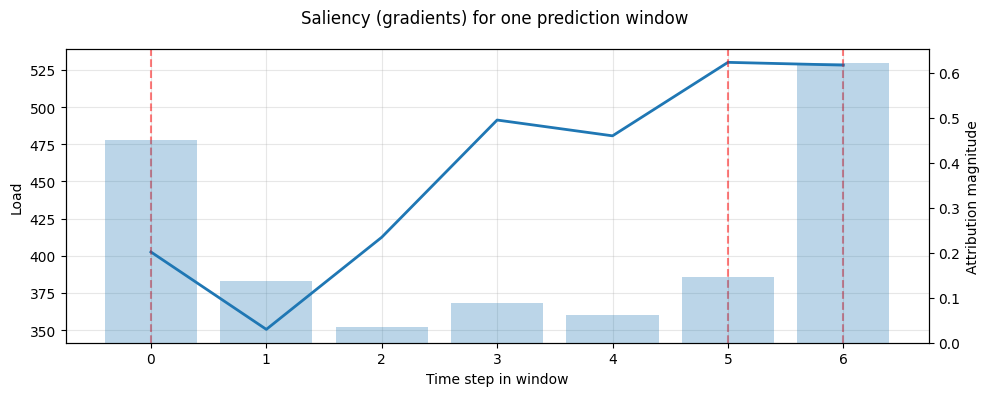

In [2]:
_ = plot_saliency_time(
    artifacts_path,
    example_index=44,
    method="saliency",   # or "ig"
    ig_steps=64,
    top_k=3,             # draw vertical lines on top-5 timesteps
)
